In [1]:
#Importing Libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms

from torch.utils.data import DataLoader, Dataset

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import os

In [2]:
#Setting hyperparameters

LR = 5e-4
BATCH_SIZE = 128
EPOCHS = 10

In [3]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'

print(device)

mps


In [4]:
os.listdir('train')[:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [5]:
train_dir = 'train'
test_dir = 'test'



In [6]:
import glob

train_list = glob.glob(os.path.join(train_dir,'*.jpg'))
test_list = glob.glob(os.path.join(test_dir,'*.jpg'))

In [7]:
train_list

['train/dog.8011.jpg',
 'train/cat.5077.jpg',
 'train/dog.7322.jpg',
 'train/cat.2718.jpg',
 'train/cat.10151.jpg',
 'train/cat.3406.jpg',
 'train/dog.1753.jpg',
 'train/cat.4369.jpg',
 'train/cat.7660.jpg',
 'train/dog.5535.jpg',
 'train/cat.8553.jpg',
 'train/cat.9895.jpg',
 'train/cat.1211.jpg',
 'train/dog.3144.jpg',
 'train/dog.775.jpg',
 'train/dog.11102.jpg',
 'train/cat.6218.jpg',
 'train/dog.11664.jpg',
 'train/dog.3622.jpg',
 'train/cat.1577.jpg',
 'train/cat.12020.jpg',
 'train/dog.5253.jpg',
 'train/cat.7106.jpg',
 'train/cat.8235.jpg',
 'train/cat.952.jpg',
 'train/dog.9469.jpg',
 'train/dog.1035.jpg',
 'train/cat.3360.jpg',
 'train/cat.11529.jpg',
 'train/cat.10637.jpg',
 'train/dog.6982.jpg',
 'train/dog.8777.jpg',
 'train/dog.7444.jpg',
 'train/cat.5711.jpg',
 'train/cat.946.jpg',
 'train/cat.3374.jpg',
 'train/dog.1021.jpg',
 'train/dog.6996.jpg',
 'train/cat.10623.jpg',
 'train/dog.8763.jpg',
 'train/cat.5705.jpg',
 'train/dog.7450.jpg',
 'train/dog.12379.jpg',
 'trai

In [8]:
test_list

['test/9733.jpg',
 'test/63.jpg',
 'test/6400.jpg',
 'test/823.jpg',
 'test/4217.jpg',
 'test/3578.jpg',
 'test/10321.jpg',
 'test/2666.jpg',
 'test/5109.jpg',
 'test/11981.jpg',
 'test/10447.jpg',
 'test/2100.jpg',
 'test/11759.jpg',
 'test/4571.jpg',
 'test/7078.jpg',
 'test/12250.jpg',
 'test/1409.jpg',
 'test/9055.jpg',
 'test/6366.jpg',
 'test/12244.jpg',
 'test/189.jpg',
 'test/9041.jpg',
 'test/6372.jpg',
 'test/11995.jpg',
 'test/10453.jpg',
 'test/2114.jpg',
 'test/4565.jpg',
 'test/4203.jpg',
 'test/10335.jpg',
 'test/2672.jpg',
 'test/9727.jpg',
 'test/6414.jpg',
 'test/77.jpg',
 'test/8439.jpg',
 'test/837.jpg',
 'test/2882.jpg',
 'test/3544.jpg',
 'test/11003.jpg',
 'test/5135.jpg',
 'test/1353.jpg',
 'test/7722.jpg',
 'test/8411.jpg',
 'test/7044.jpg',
 'test/8377.jpg',
 'test/1435.jpg',
 'test/9069.jpg',
 'test/5653.jpg',
 'test/3222.jpg',
 'test/11765.jpg',
 'test/5647.jpg',
 'test/2128.jpg',
 'test/3236.jpg',
 'test/11771.jpg',
 'test/4559.jpg',
 'test/7050.jpg',
 'tes

In [9]:
print('The length of the train_list is',len(train_list))
print('The length of the test_list is',len(test_list))


The length of the train_list is 25000
The length of the test_list is 12500


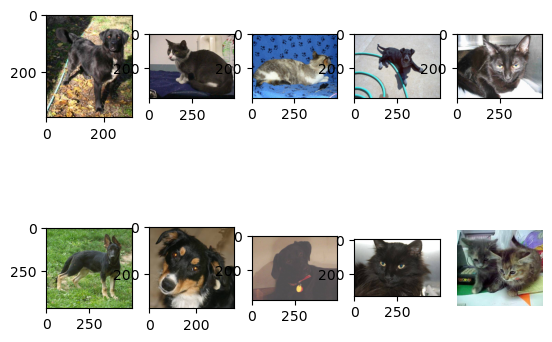

In [10]:
from PIL import Image
random_idx = np.random.randint(0,len(train_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(train_list[idx])
    plt.imshow(img)
    i+=1

plt.axis('off')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

train_list, val_list = train_test_split(train_list,test_size=0.2)

In [12]:
#Image augmentation via transforms

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])


In [39]:
#Defining the datasetes

class dataset(Dataset):
    def __init__(self,file_list,transforms):
        self.file_list = file_list
        self.transforms = transforms
    
    def __len__(self):
        self.file_length = len(self.file_list)
        return self.file_length

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transforms(img)

        label = img_path.split('/')[-1].split('.')[0]
        if label == 'dog':
            label = 1
        elif label == 'cat':
            label = 0
        
        return img_transformed, label

In [40]:
train_data = dataset(train_list,train_transforms)
val_data = dataset(val_list,val_transforms)
test_data = dataset(test_list,test_transforms)

In [41]:
train_loader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
val_loader = DataLoader(dataset=val_data,batch_size=BATCH_SIZE,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=True)

In [42]:
#Building the Neural Network Model

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc1 = nn.Linear(3*3*64,128)
        self.fc2 = nn.Linear(128,10)
        self.fc3 = nn.Linear(10,2)
        self.relu = nn.ReLU()
    
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)

        out = out.view(out.size(0),-1)

        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)

        return out






In [17]:
model = Model().to(device)

In [18]:
model.train()

Model(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_feature

In [19]:
optimizer = optim.Adam(params=model.parameters(),lr=LR)
criterion = nn.CrossEntropyLoss()

In [20]:
#Training the network

for epoch in range(EPOCHS):
    epoch_loss =0 
    epoch_acc =0

    for data, label in train_loader:
        data = data.to(device)
        label = label.to(device)


        output = model(data)

        loss = criterion(output,label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        acc = (output.argmax(dim=1) == label).float().mean()

        epoch_acc += acc/len(train_loader)
        epoch_loss += loss/len(train_loader)

    print('Epoch: {}, train_accuracy: {}, train_loss: {}'.format(epoch+1,epoch_acc,epoch_loss))

    with torch.no_grad():
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label)
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))



Epoch: 1, train_accuracy: 0.6448550820350647, train_loss: 0.6225417852401733
Epoch : 1, val_accuracy : 0.6953123807907104, val_loss : 0.5780670642852783
Epoch: 2, train_accuracy: 0.709245502948761, train_loss: 0.5610679388046265
Epoch : 2, val_accuracy : 0.736328125, val_loss : 0.527475893497467
Epoch: 3, train_accuracy: 0.7337281107902527, train_loss: 0.5306870937347412
Epoch : 3, val_accuracy : 0.7437499165534973, val_loss : 0.5180217623710632
Epoch: 4, train_accuracy: 0.7386046051979065, train_loss: 0.5201917886734009
Epoch : 4, val_accuracy : 0.7642578482627869, val_loss : 0.48790305852890015
Epoch: 5, train_accuracy: 0.7499504089355469, train_loss: 0.501977264881134
Epoch : 5, val_accuracy : 0.7541014552116394, val_loss : 0.49544140696525574
Epoch: 6, train_accuracy: 0.7660731077194214, train_loss: 0.4848197102546692
Epoch : 6, val_accuracy : 0.757031261920929, val_loss : 0.49225619435310364
Epoch: 7, train_accuracy: 0.7656748294830322, train_loss: 0.4751080274581909
Epoch : 7, va

In [44]:
dog_probs = []

model.eval()

with torch.no_grad():
    for data, fileid in test_loader:
        data = data.to(device)
        preds = model(data)

        preds_list = F.softmax(preds,dim=1)[:,1].tolist()

        dog_probs += list(zip(list(fileid),preds_list))

In [45]:
dog_probs.sort(key = lambda x: int(x[0]))

In [46]:
dog_probs

[('1', 0.8686252236366272),
 ('2', 0.8905227780342102),
 ('3', 0.5167003273963928),
 ('4', 0.9800884127616882),
 ('5', 0.08555883914232254),
 ('6', 0.5872388482093811),
 ('7', 0.016747118905186653),
 ('8', 0.6125332713127136),
 ('9', 0.27184024453163147),
 ('10', 0.24940842390060425),
 ('11', 0.018748817965388298),
 ('12', 0.3696237802505493),
 ('13', 0.7436603903770447),
 ('14', 0.5597369074821472),
 ('15', 0.6991736888885498),
 ('16', 0.4939141869544983),
 ('17', 0.7259033918380737),
 ('18', 0.9932061433792114),
 ('19', 0.02523886226117611),
 ('20', 0.34917688369750977),
 ('21', 0.9053467512130737),
 ('22', 0.18946583569049835),
 ('23', 0.5160561203956604),
 ('24', 0.5974535942077637),
 ('25', 0.8294228911399841),
 ('26', 0.8366458415985107),
 ('27', 0.9370185732841492),
 ('28', 0.029371166601777077),
 ('29', 0.7386183738708496),
 ('30', 0.8397710919380188),
 ('31', 0.915048360824585),
 ('32', 0.15646271407604218),
 ('33', 0.9177154302597046),
 ('34', 0.2569240629673004),
 ('35', 0.0

In [47]:

idx = list(map(lambda x:x[0],dog_probs))
prob = list(map(lambda x: x[1],dog_probs))

In [48]:
submission = pd.DataFrame({'id':idx,'label':prob})


In [49]:
submission.to_csv('results.csv',index=False)

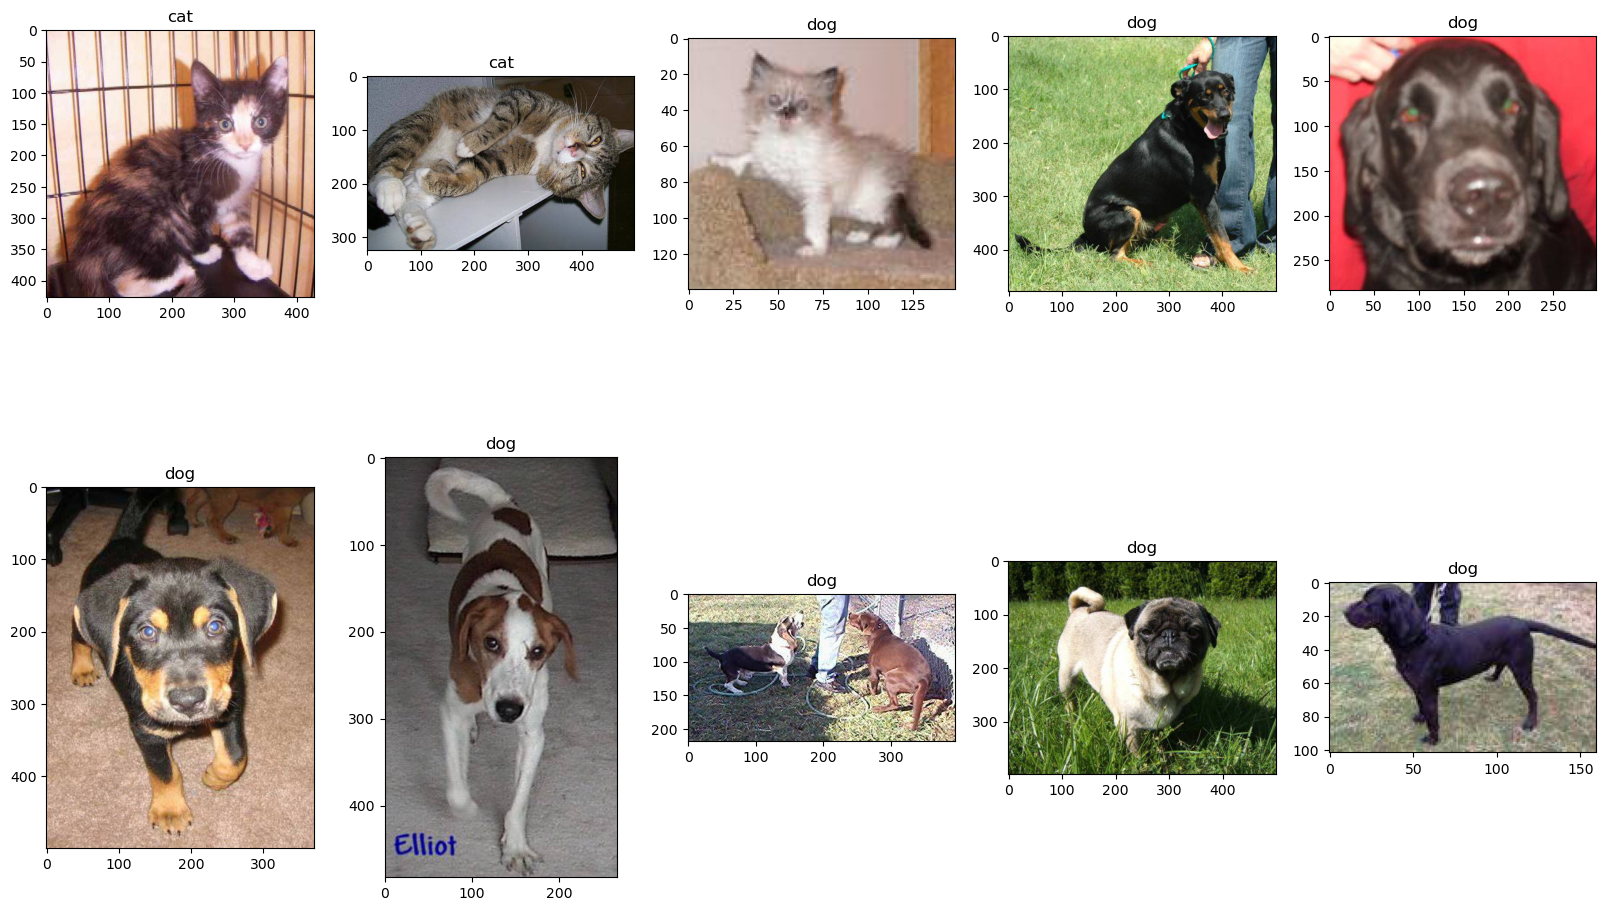

In [50]:
import random

id_list = []
classes = {0:'cat',1:'dog'}

fig, axes = plt.subplots(2,5,figsize=(20,12), facecolor='w')

for ax in axes.ravel():
    i = random.choice(submission['id'].values)

    label = submission['label'].loc[submission['id'] == i].values

    if label>0.5:
        label = 1
    else:
        label = 0
    img_path = os.path.join(test_dir,'{}.jpg'.format(i))
    img = Image.open(img_path)

    ax.set_title(classes[label])
    ax.imshow(img)
